## Introduction
The Data-Set contains offerings of used cars in germany (20 attributes, 371528 examples). These cars where submitted to the website 'ebay Kleinanzeigen' and have been crawled between 2016-03-05 and 2016-04-07. In the following we are going to take a look at the data, clean it step by step and reach the filtered version.

In [53]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [62]:
nRowsRead = 371528 # specify 'None' if want to read whole file
all_data = pd.read_csv('C:/Users/himanshu/hw/autos.csv',encoding='latin1', delimiter=',', nrows = nRowsRead)
all_data.dataframeName = 'autos.csv'
nRow, nCol = all_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 371528 rows and 20 columns


In [55]:
all_data.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


There are quite a few strange values and columns. For cleaning purposes I'm going to inspect each column for itself and will remove undesired rows to counteract the data-distortion.

In [63]:
#inspecting: nrOfPictures
print(all_data['nrOfPictures'].sum(), 'pictures in all offers combined')

0 pictures in all offers combined


In [64]:
#there are no pictures at all in these adverts: Hence we drop the column
work_data=all_data.drop('nrOfPictures',1)

#inspecting: seller
print(work_data.groupby('seller').size())

seller
gewerblich         3
privat        371525
dtype: int64


In [65]:
#we can dismiss the three rows containing 'gewerblich' and then get rid of the column 'seller'. 
#All adverts are now submitted by private sellers.
work_data = work_data[work_data.seller != 'gewerblich']
work_data=work_data.drop('seller',1)


#inspecting: offerType
print(work_data.groupby('offerType').size())

offerType
Angebot    371513
Gesuch         12
dtype: int64


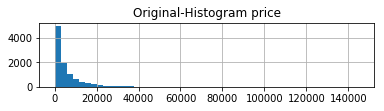

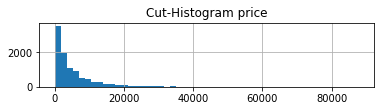

10778 cars with price 0


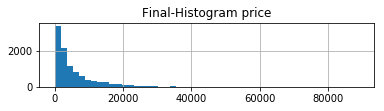

In [66]:
#The remaining columns look useful and we're diving to the next level.
#We'll need a little sample of our data to save some time plotting everything. 
sample_data=work_data.sample(n=10000, random_state=1)

#inspecting: price
plt.subplot(3,1,1)
sample_data['price'].hist(bins=50)
plt.title('Original-Histogram price')
plt.show()
#There are kinda expensive cars on sale. The owners are slightly overestimating the value I guess.

#I'll' cut the price at 100000
work_data = work_data[work_data.price < 100000]
sample_data=work_data.sample(n=10000, random_state=1)

plt.subplot(3,1,2)
sample_data['price'].hist(bins=50)
plt.title('Cut-Histogram price')
plt.show()



print(len(work_data[work_data.price == 0]), 'cars with price 0')
#The other way round some people are giving their car away for free. Unlikly in such high rates. Remove!
work_data = work_data[work_data.price != 0]
sample_data=work_data.sample(n=10000, random_state=1)

plt.subplot(3,1,3)
sample_data['price'].hist(bins=50)
plt.title('Final-Histogram price')
plt.show()

In [67]:
nRowsRead = 10000 # specify 'None' if want to read whole file
# cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv has 1770 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('C:/Users/himanshu/hw/cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv',encoding='latin1', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1770 rows and 8 columns


In [61]:
df2.head(5)

,count,km,year,powerPS,minPrice,maxPrice,avgPrice,sdPrice
0,19,125000,1991,40,300,1499,648.3158,352.035293
1,69,150000,1991,40,110,1600,516.4348,346.767661
2,11,90000,1991,60,330,10000,2342.4545,3017.432333
3,26,100000,1991,60,200,8750,1392.3846,1598.662833
4,42,125000,1991,60,150,4600,1140.6429,1010.314138


## Summary
This concludes your starter analysis!